In [2]:
import os

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Modcode\ML_Live-_Class\data\gene_expression.csv')

df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

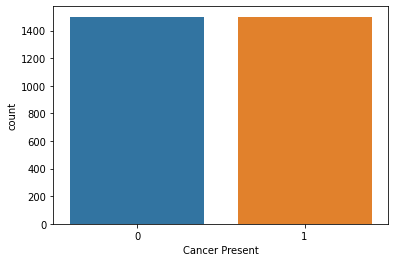

In [5]:
sns.countplot(data=df,x='Cancer Present')

In [6]:
df.shape

(3000, 3)

In [7]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

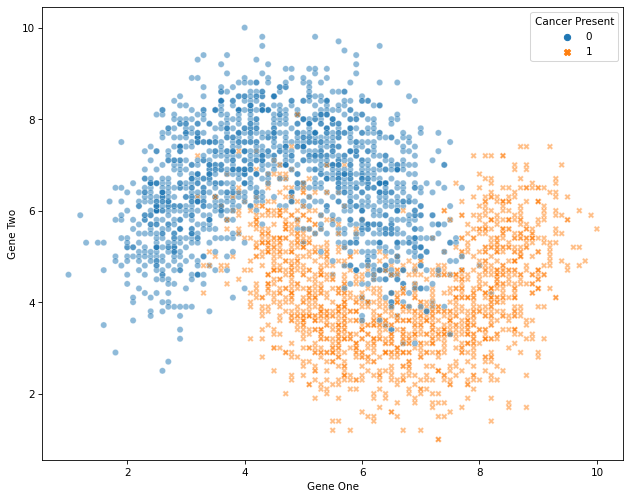

In [17]:
plt.figure(figsize=(10,8), dpi=75)
sns.scatterplot(data=df, x='Gene One', y='Gene Two',hue='Cancer Present',style='Cancer Present', alpha=0.5)

(4.0, 8.0)

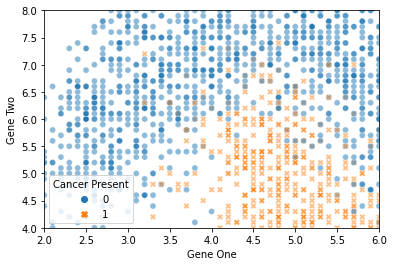

In [15]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two',hue='Cancer Present', style='Cancer Present', alpha=0.5)
plt.xlim(2,6)
plt.ylim(4,8)

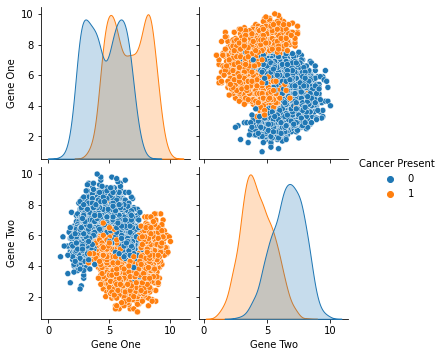

In [19]:
sns.pairplot(data=df, hue='Cancer Present')   # if there are more numbers of features, pass only important features according to domain knolodge

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X = df.drop('Cancer Present', axis=1)
X.head()

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4


In [23]:
y = df['Cancer Present']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Cancer Present, dtype: int64

In [24]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X_train = scaler.fit_transform(X_train)

In [27]:
scaled_X_test = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
KNN_model = KNeighborsClassifier(n_neighbors=1)

In [31]:
KNN_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred = KNN_model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1], d

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, plot_precision_recall_curve,plot_confusion_matrix, accuracy_score

In [36]:
confusion_matrix(y_test,y_pred)   #28 mis-classification

array([[118,  18],
       [ 10, 154]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       136
           1       0.90      0.94      0.92       164

    accuracy                           0.91       300
   macro avg       0.91      0.90      0.91       300
weighted avg       0.91      0.91      0.91       300



In [38]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

## choosing the value of K for KNN (Elbow Method & K-Fold CV)

1. Elbow Method

In [40]:
# we try to see different Error Rate, as the value of K changes ,Error rate changes too.

test_error_rates = []

for k in range(1,30):
     knn_model = KNeighborsClassifier(n_neighbors= k)

     knn_model.fit(scaled_X_train,y_train)

     Y_pred = knn_model.predict(scaled_X_test)

     test_error = 1 - accuracy_score(y_test, Y_pred)

     test_error_rates.append(test_error)

test_error_rates


[0.09333333333333338,
 0.10999999999999999,
 0.08666666666666667,
 0.09333333333333338,
 0.07999999999999996,
 0.07999999999999996,
 0.08333333333333337,
 0.07666666666666666,
 0.08999999999999997,
 0.08333333333333337,
 0.08333333333333337,
 0.09333333333333338,
 0.09333333333333338,
 0.08666666666666667,
 0.07999999999999996,
 0.07999999999999996,
 0.07666666666666666,
 0.07999999999999996,
 0.07333333333333336,
 0.07666666666666666,
 0.07333333333333336,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336]

Text(0.5, 0, 'K Neighbours')

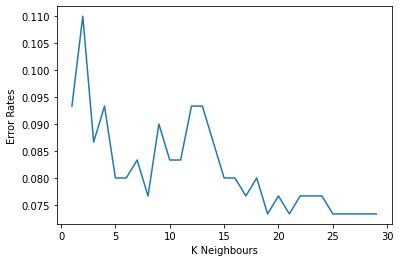

In [41]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('Error Rates')
plt.xlabel('K Neighbours')

In [43]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 2,
 'weights': 'uniform'}

2. grid search CV with the help of pipeline

In [48]:
#pipeline helps in scalling, model building all at once
operations = [('scaler',scaler), ('knn',knn_model)]

In [44]:
from sklearn.pipeline import Pipeline

In [49]:
Pipyy = Pipeline(operations)

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [57]:
param_grid = {'knn__n_neighbors': k_values, 'knn__metric':['euclidean']}

In [59]:
Grid_model_classifier = GridSearchCV(Pipyy, param_grid, cv=5, scoring='accuracy')

In [60]:
Grid_model_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=29))]),
             param_grid={'knn__metric': ['euclidean'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [62]:
Grid_model_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=9))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(metric='euclidean', n_neighbors=9),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'euclidean',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 9,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [63]:
Grid_predict = Grid_model_classifier.predict(X_test)

In [64]:
print(classification_report(y_test, Grid_predict))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       136
           1       0.92      0.91      0.92       164

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

